In [2]:
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import re
import json
from konlpy.tag import Okt
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from tensorflow.python.keras.preprocessing.text import Tokenizer
%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
C:\Users\linda\Anaconda3\envs\pbl\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


## 데이터 불러오기

In [3]:
DATA_IN_PATH = 'D:/PBL 스터디/PBL 실습/pbl_data_in/'
print("파일 크기 : ")
for file in os.listdir(DATA_IN_PATH):
    if 'csv' in file :
        print(file.ljust(30) + str(round(os.path.getsize(DATA_IN_PATH + file) / 1000000, 2)) + 'MB')

파일 크기 : 
clean_test_8.csv              0.26MB
clean_test_label_8.csv        0.0MB
clean_train_26.csv            2.67MB
clova.csv                     0.0MB
clova_test_clean.csv          0.0MB
real_test_38.csv              0.25MB
real_test_label_38.csv        0.01MB
real_train_38.csv             2.61MB
test_data.csv                 0.2MB
train_data.csv                1.95MB


In [4]:
train_data = pd.read_csv(DATA_IN_PATH+'train_data.csv', header = 0)
test_data = pd.read_csv(DATA_IN_PATH+'test_data.csv', header = 0)
train_data.head()

,text,label
0,"""강성범 이자식 연예계 퇴출 시케야 된다.""",0
1,"""그렇게 안봤는데 상황판단이 그렇게도 안되나""",0
2,"""이재명이 당선되면 나라 박살 안난대요? 공산주의화 빈부격차는 되려 더 커지고 나랏...",0
3,"""시부리지 말고 찌그러져 있거라""",0
4,"""욕설유도 고소 용돈벌이""",0


In [5]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    2000 non-null   object
 1   label   2000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


In [6]:
print("train 긍정 리뷰 개수: {}".format(train_data['label'].value_counts()[0]))
print("train 부정 리뷰 개수: {}".format(train_data['label'].value_counts()[1]))
print("test 긍정 리뷰 개수: {}".format(test_data['label'].value_counts()[0]))
print("test 부정 리뷰 개수: {}".format(test_data['label'].value_counts()[1]))

train 긍정 리뷰 개수: 10000
train 부정 리뷰 개수: 10000
test 긍정 리뷰 개수: 1000
test 부정 리뷰 개수: 1000


## 데이터셋 구조 - 문장

In [7]:
train_length = train_data['text'].astype(str).apply(len)

Text(0, 0.5, 'Number of review')

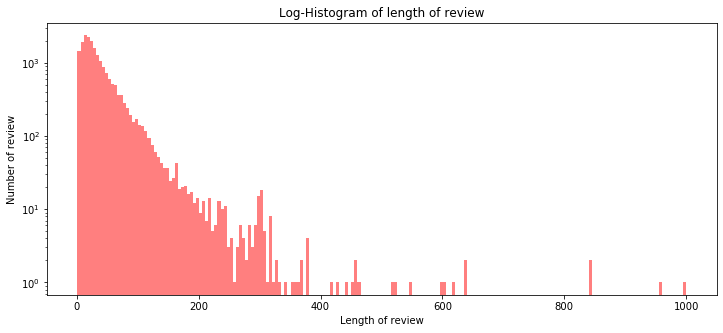

In [8]:
# 그래프에 대한 이미지 사이즈 선언
# figsize: (가로, 세로) 형태의 튜플로 입력
plt.figure(figsize=(12, 5))
# 히스토그램 선언
# bins: 히스토그램 값들에 대한 버켓 범위
# range: x축 값의 범위
# alpha: 그래프 색상 투명도
# color: 그래프 색상
# label: 그래프에 대한 라벨
plt.hist(train_length, bins=200, alpha=0.5, color= 'r', label='word')
plt.yscale('log', nonposy='clip')
# 그래프 제목
plt.title('Log-Histogram of length of review')
# 그래프 x 축 라벨
plt.xlabel('Length of review')
# 그래프 y 축 라벨
plt.ylabel('Number of review')

In [9]:
print('리뷰 길이 최대 값: {}'.format(np.max(train_length)))
print('리뷰 길이 최소 값: {}'.format(np.min(train_length)))
print('리뷰 길이 평균 값: {:.2f}'.format(np.mean(train_length)))
print('리뷰 길이 표준편차: {:.2f}'.format(np.std(train_length)))
print('리뷰 길이 중간 값: {}'.format(np.median(train_length)))
# 사분위의 대한 경우는 0~100 스케일로 되어있음
print('리뷰 길이 제 1 사분위: {}'.format(np.percentile(train_length, 25)))
print('리뷰 길이 제 3 사분위: {}'.format(np.percentile(train_length, 75)))
print('리뷰 길이 99.9%: {}'.format(np.percentile(train_length, 99.9)))

리뷰 길이 최대 값: 1000
리뷰 길이 최소 값: 1
리뷰 길이 평균 값: 37.92
리뷰 길이 표준편차: 42.50
리뷰 길이 중간 값: 26.0
리뷰 길이 제 1 사분위: 14.0
리뷰 길이 제 3 사분위: 47.0
리뷰 길이 99.9%: 378.0


## 데이터셋 구조 - 단어

In [10]:
train_word_counts = train_data['text'].astype(str).apply(lambda x:len(x.split(' ')))

Text(0, 0.5, 'Number of reviews')

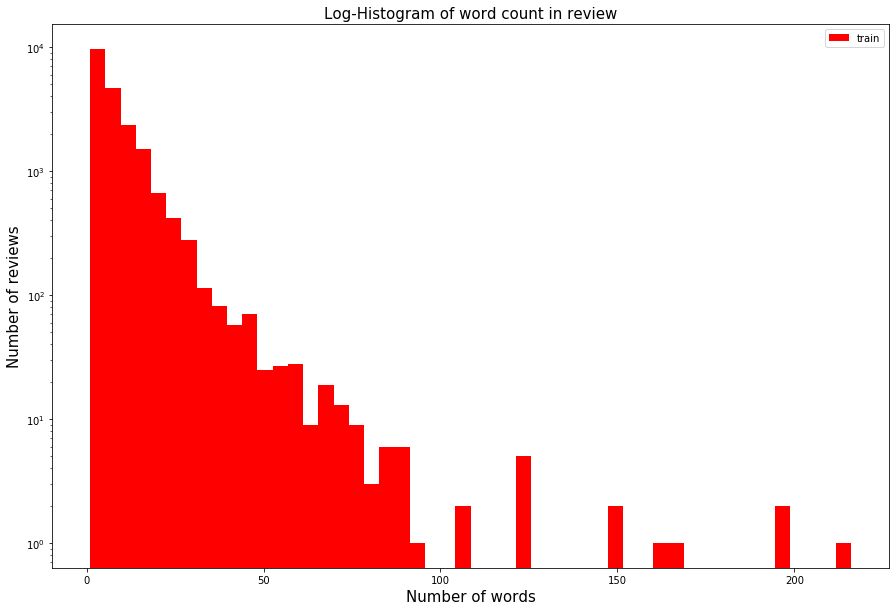

In [11]:
plt.figure(figsize=(15, 10))
plt.hist(train_word_counts, bins=50, facecolor='r',label='train')
plt.title('Log-Histogram of word count in review', fontsize=15)
plt.yscale('log', nonposy='clip')
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Number of reviews', fontsize=15)

In [12]:
print('리뷰 단어 개수 최대 값: {}'.format(np.max(train_word_counts)))
print('리뷰 단어 개수 최소 값: {}'.format(np.min(train_word_counts)))
print('리뷰 단어 개수 평균 값: {:.2f}'.format(np.mean(train_word_counts)))
print('리뷰 단어 개수 표준편차: {:.2f}'.format(np.std(train_word_counts)))
print('리뷰 단어 개수 중간 값: {}'.format(np.median(train_word_counts)))
# 사분위의 대한 경우는 0~100 스케일로 되어있음
print('리뷰 단어 개수 제 1 사분위: {}'.format(np.percentile(train_word_counts, 25)))
print('리뷰 단어 개수 제 3 사분위: {}'.format(np.percentile(train_word_counts, 75)))
print('리뷰 단어 개수 90%: {}'.format(np.percentile(train_word_counts, 99)))

리뷰 단어 개수 최대 값: 216
리뷰 단어 개수 최소 값: 1
리뷰 단어 개수 평균 값: 8.42
리뷰 단어 개수 표준편차: 9.45
리뷰 단어 개수 중간 값: 6.0
리뷰 단어 개수 제 1 사분위: 3.0
리뷰 단어 개수 제 3 사분위: 10.0
리뷰 단어 개수 90%: 45.0099999999984


## 전처리

In [13]:
import re
from soynlp.normalizer import *
def cleanse(text):
    pattern = re.compile(r'\s+')
    text = re.sub(pattern, ' ', str(text))
    text = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣ0-9]', '', str(text))
    return text

def preprocessing(sentence, okt, remove_stopwords = False, stop_words = []):
    # 함수의 인자는 다음과 같다.
    # sentence : 전처리할 텍스트
    # okt : okt 객체를 반복적으로 생성하지 않고 미리 생성후 인자로 받는다.
    # remove_stopword : 불용어를 제거할지 선택 기본값은 False
    # stop_word : 불용어 사전은 사용자가 직접 입력해야함 기본값은 비어있는 리스트
    
    # 1. 한글 및 공백을 제외한 문자 모두 제거.
    sentence_text = repeat_normalize(sentence, num_repeats=2)
    
    # 2. okt 객체를 활용해서 형태소 단위로 나눈다.
    wd_sentence = okt.morphs(sentence_text, stem=True)
    
    if remove_stopwords:
        
        # 불용어 제거(선택적)
        wd_sentence = [token for token in wd_sentence if not token in stop_words]
        
   
    return wd_sentence

In [14]:
stop_words = [ '은', '는', '이', '가', '하', '아', '것', '들','의', '있', '되', '수', '보', '주', '등', '한']
okt = Okt()
clean_train_sentence = []

In [15]:
train_data['text'] = train_data['text'].apply(cleanse)

In [16]:
for review in train_data['text']:
    # 비어있는 데이터에서 멈추지 않도록 string인 경우만 진행
    if type(review) == str:
        clean_train_sentence.append(preprocessing(review, okt, remove_stopwords = True, stop_words=stop_words))
    else:
        clean_train_sentence.append([])  #string이 아니면 비어있는 값 추가
clean_train_sentence[:4]

clean_train_df = pd.DataFrame({'text':clean_train_sentence,'label':train_data['label']})

In [23]:
clean_train_sentence

[['강성범', '자식', '연예계', '퇴', '출시', '케', '야', '되다'],
 ['그렇게', '안', '보다', '상황', '판단', '그렇다', '안되다'],
 ['이재명',
  '당선',
  '되다',
  '박살',
  '안',
  '난대',
  '요',
  '공산주의',
  '화',
  '빈부격차',
  '되다',
  '더',
  '커지다',
  '랏돈',
  '받다',
  '살다',
  '근로',
  '의사',
  '없다',
  '국민',
  '양산',
  '시키다',
  '같다',
  '더',
  '걱정',
  '이다',
  '정치성향',
  '이야',
  '개인',
  '적',
  '취향',
  '이라',
  '이해',
  '하다',
  '한때',
  '방송',
  '에서',
  '유명하다',
  '분',
  '분별',
  '력',
  '과',
  '판단력',
  '약해지다',
  '같다',
  '안타깝다'],
 ['시부', '리지', '말고', '찌그러지다'],
 ['욕설', '유도', '고', '소용', '돈벌이'],
 ['그냥', '맛', '가다'],
 ['ㅋ', '잡', '을', '놈', '들다', '잡아넣다', '이나라', '꼴', 'ㅜㅜ'],
 ['밉다'],
 ['머', '야', '갑작', '튀어나오다', '관심', '받다', '모양', '이네'],
 ['전라', '대', '깨', '표본', '강냉이', '강성범', 'ㅋㅋ', '진짜', '꼴갑', '떤다'],
 ['이나', '라이미', '박살', '나다', '성', '범', '그렇다', '살다'],
 ['오다',
  '연예인',
  '거의',
  '다대',
  '깨물다',
  '얘',
  '네',
  '쉬다',
  '돈버',
  '데',
  '공평하다',
  '세금',
  '열',
  '배정',
  '도',
  '때리다'],
 ['얜또왜이려'],
 ['개그', '가안', '먹히다', '정치', '판', '에', '기웃기웃'],
 ['좌파', '답', '없다', '드', '라'

In [24]:
clean_train_df

,text,label
0,"[강성범, 자식, 연예계, 퇴, 출시, 케, 야, 되다]",0
1,"[그렇게, 안, 보다, 상황, 판단, 그렇다, 안되다]",0
2,"[이재명, 당선, 되다, 박살, 안, 난대, 요, 공산주의, 화, 빈부격차, 되다,...",0
3,"[시부, 리지, 말고, 찌그러지다]",0
4,"[욕설, 유도, 고, 소용, 돈벌이]",0
...,...,...
19995,"[야하다, 아니다, 더럽다, ㅎㅎㅎ, 그래도, 헤어, 드라이기, 본인, 만, 쓰다,...",1
19996,"[모델, 앞, 에선, 찍, 소리, 도, 못, 하다, 안경, 여드름, 돼지, 쿵쾅, ...",1
19997,"[근데, 신기하다, 쟤, 그냥, 성, 괴, 에, 이쁘다, 아니다, 짱깨, 놈, 대리...",1
19998,"[야돈, 있다, 조선족, 한테, 칼, 로, 찌르다, 시키다]",1


In [17]:
test_data['text'] = test_data['text'].apply(cleanse)

In [18]:
#test_data = pd.read_csv(DATA_IN_PATH + 'testdata.csv', headear = 0)
#test_data = pd.read_csv(DATA_IN_PATH + 'testdata.csv', names=['sentence'] )

clean_test_sentence = []

for review in test_data['text']:
    # 비어있는 데이터에서 멈추지 않도록 string인 경우만 진행
    if type(review) == str:
        clean_test_sentence.append(preprocessing(review, okt, remove_stopwords = True, stop_words=stop_words))
    #else:
    #    clean_test_sentence.append([])  #string이 아니면 비어있는 값 추가
        
clean_test_onlysentence_df = pd.DataFrame({'text':clean_test_sentence})
clean_test_onlylabel_df = pd.DataFrame({'label':test_data['label']})

In [25]:
clean_test_sentence

[['그렇다', '이재명', '되다', '야하다'],
 ['이분', '누구세요', '아시', '분손'],
 ['돈', '벌다', '먹고살다', '힘들다', '다그치다', '성', '범', 'ㅋㅋㅋ'],
 ['뭘', '안다', '한마디', '하고', 'ㅋ', '돈좀', '벌다'],
 ['얼', '측', '없다', '미나', '라가', '작살', '나다', '이야'],
 ['이재명', '대통령', '되다', '박살', '아니다', '나라', '망하다'],
 ['오늘', '부터', '1일'],
 ['나르다', '나가다', '박살', '나불', '거', '시', '요', '잉'],
 ['양',
  '아치',
  '재앙',
  '정부',
  '따다',
  '깔다',
  '성',
  '범',
  '늬',
  '아오지',
  '탄광',
  '가다',
  '보내다',
  '그러다가',
  '향',
  '불소',
  '식',
  '들리다',
  '불상',
  '중생',
  'ㅠㅠ'],
 ['제', '성', '범', '불쌍하다', '돈', '벌리다', '저러다', '모습', '에'],
 ['너', '도', '이그'],
 ['제발', '코', '메다', '그만하다', '라성', '범', '공인', '면'],
 ['왜', '저러다', '살', '지'],
 ['너', '같다', '무식하다', '깽깽', '겁', '내다', '죄', '지은', '게', '없다', '무섭다', '없다'],
 ['먹고살다',
  '힘들다',
  '더',
  '열심히',
  '해',
  '라그',
  '래야',
  '경상도',
  '좌파',
  '주군',
  '한테',
  '눈',
  '에',
  '띄다',
  '전라도',
  '지방',
  '의원',
  '이라도',
  '자리',
  '나',
  '받다'],
 ['딱', '맞다', '하다', '네', '조선일보', '진실', '을', '보다'],
 ['아직도', '저러다', '진짜', '불쌍하다', '자식', '미래', '걱정', '도', '안되다'],
 

In [19]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(clean_train_sentence) ###only train data만 단어사전에 
train_sequences = tokenizer.texts_to_sequences(clean_train_sentence)
test_sequences = tokenizer.texts_to_sequences(clean_test_sentence)

word_vocab = tokenizer.word_index # 단어 사전 형태
# word_vocab["<PAD>"] = 0

MAX_SEQUENCE_LENGTH = 38 #문장 최대 길이, 중간값 지정

train_inputs = pad_sequences(train_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post') #train data벡터화
train_labels = np.array(train_data['label'])
test_inputs = pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post') #test data 벡터화
test_labels = np.array(test_data['label'])

In [21]:
DATA_IN_PATH = 'D:/PBL 스터디/PBL 실습/pbl_data_in/'
from collections import OrderedDict

TRAIN_INPUT_DATA = 'real_train_input_38.npy'
TRAIN_LABEL_DATA = 'real_train_label_38.npy'
TRAIN_CLEAN_DATA = 'real_train_38.csv'

TEST_INPUT_DATA = 'real_test_input_38.npy'
TEST_CLEAN_DATA = 'real_test_38.csv'
TEST_CLEAN_LABEL = 'real_test_label_38.csv'
TEST_LABEL_DATA = 'real_test_label_38.npy'

DATA_CONFIGS = 'real_data_configs_38.json'

# data_configs = {}
data_configs = OrderedDict()

data_configs['vocab'] = word_vocab
#data_configs['vocab_size'] = len(word_vocab) # vocab size 추가
data_configs['vocab_size'] = len(word_vocab)+1

import os
# 저장하는 디렉토리가 존재하지 않으면 생성
if not os.path.exists(DATA_IN_PATH):
    os.makedirs(DATA_IN_PATH)

# 전처리 된 학습 데이터를 넘파이 형태로 저장
np.save(open(DATA_IN_PATH + TRAIN_INPUT_DATA, 'wb'), train_inputs)
np.save(open(DATA_IN_PATH + TRAIN_LABEL_DATA, 'wb'), train_labels)

# 전처리 된 학습 데이터를 csv 형태로 저장
clean_train_df.to_csv(DATA_IN_PATH +TRAIN_CLEAN_DATA, index = False)
clean_test_onlysentence_df.to_csv(DATA_IN_PATH +TEST_CLEAN_DATA, index = False)
clean_test_onlylabel_df.to_csv(DATA_IN_PATH + TEST_CLEAN_LABEL, index = False )

# 전처리 된 테스트 데이터를 넘파이 형태로 저장
np.save(open(DATA_IN_PATH + TEST_INPUT_DATA, 'wb'), test_inputs)
np.save(open(DATA_IN_PATH + TEST_LABEL_DATA, 'wb'), test_labels)

# 데이터 사전을 json 형태로 저장
#json.dump(data_configs, open(DATA_IN_PATH + DATA_CONFIGS, 'w',encoding='UTF-8'), ensure_ascii=False)

#json 파일 생성
with open(DATA_IN_PATH + DATA_CONFIGS, 'w', encoding='UTF-8') as f:
    json_data = json.dumps(data_configs)
    json_decode_data = json_data.encode('utf8', 'replace').decode('unicode-escape')
    f.write(json_decode_data)